# Problem statement

In [17]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from mlxtend.frequent_patterns import apriori              # to create frequent itemset
from mlxtend.frequent_patterns import association_rules    #Get the association rules
from mlxtend.preprocessing import TransactionEncoder      #to convert transaction to 1 and 0 array

In [3]:
book_df=pd.read_csv('book.csv')

In [4]:
book_df.head(10)

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0
5,1,0,0,0,0,1,0,0,0,0,1
6,0,1,0,0,0,0,0,0,0,0,0
7,0,1,0,0,1,0,0,0,0,0,0
8,1,0,0,1,0,0,0,0,0,0,0
9,1,1,1,0,0,0,1,0,0,0,0


In [5]:
book_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ChildBks   2000 non-null   int64
 1   YouthBks   2000 non-null   int64
 2   CookBks    2000 non-null   int64
 3   DoItYBks   2000 non-null   int64
 4   RefBks     2000 non-null   int64
 5   ArtBks     2000 non-null   int64
 6   GeogBks    2000 non-null   int64
 7   ItalCook   2000 non-null   int64
 8   ItalAtlas  2000 non-null   int64
 9   ItalArt    2000 non-null   int64
 10  Florence   2000 non-null   int64
dtypes: int64(11)
memory usage: 172.0 KB


In [6]:
c=list(book_df.shape)
c[0]

2000

In [7]:
book_df.describe()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
count,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,0.423000,0.247500,0.43100,0.282000,0.214500,0.241000,0.276000,0.113500,0.037000,0.048500,0.108500
std,0.494159,0.431668,0.49534,0.450086,0.410578,0.427797,0.447129,0.317282,0.188809,0.214874,0.311089
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.00000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
cols=book_df.columns
freq_1=[]
for i in cols:
        a=book_df[i].value_counts()
        freq_1.append(a[1])
freq_data=pd.DataFrame(freq_1,columns=['freq'])
freq_data['categ']=cols

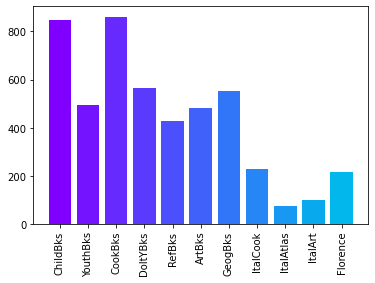

In [9]:
colors=plt.cm.rainbow(np.linspace(0,1,40))
plt.bar(freq_data['categ'],height=freq_data['freq'],color=colors)
plt.xticks(rotation=90)
plt.show()


# Parameter Tuning 
## Applying apriori algorith with different support ranging from 0.1 t0 0.9

In [10]:
sup_range=np.linspace(0.1,1,10)
no_rules=[]

frequent_itemsets1=pd.DataFrame()
for i in sup_range:
    d=[]
    frequent_itemsets=pd.DataFrame()
    frequent_itemsets=apriori(book_df,min_support=i,use_colnames=True)
    frequent_itemsets['length']=frequent_itemsets['itemsets'].apply(lambda x:len(x))
    c=list(frequent_itemsets.shape)
    for j in range(0,c[0]):
                d.append(i)
    frequent_itemsets['minsupport']=d 
    frequent_itemsets1=frequent_itemsets1.append(frequent_itemsets,ignore_index=False)
list_set=[]
s=frequent_itemsets1.shape
for i in range(0,s[0]):
    list_set.append(list(frequent_itemsets1.iloc[i,1]))  # converting frozen set to list 
frequent_itemsets1['list_set']=list_set
    
frequent_itemsets1

,support,itemsets,length,minsupport,list_set
0,0.4230,(ChildBks),1,0.1,[ChildBks]
1,0.2475,(YouthBks),1,0.1,[YouthBks]
2,0.4310,(CookBks),1,0.1,[CookBks]
3,0.2820,(DoItYBks),1,0.1,[DoItYBks]
4,0.2145,(RefBks),1,0.1,[RefBks]
5,0.2410,(ArtBks),1,0.1,[ArtBks]
6,0.2760,(GeogBks),1,0.1,[GeogBks]
7,0.1135,(ItalCook),1,0.1,[ItalCook]
8,0.1085,(Florence),1,0.1,[Florence]
9,0.1650,"(YouthBks, ChildBks)",2,0.1,"[YouthBks, ChildBks]"


In [19]:
gf=frequent_itemsets1.groupby('minsupport')

minsupport
0.1    AxesSubplot(0.125,0.125;0.775x0.755)
0.2    AxesSubplot(0.125,0.125;0.775x0.755)
0.3    AxesSubplot(0.125,0.125;0.775x0.755)
0.4    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

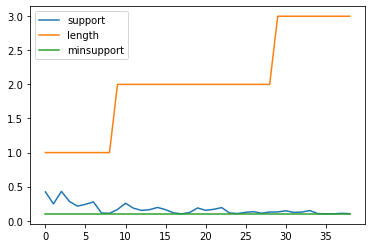

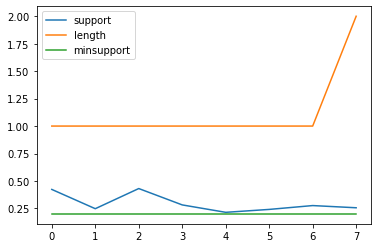

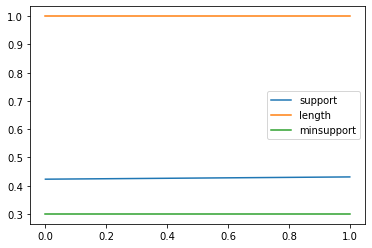

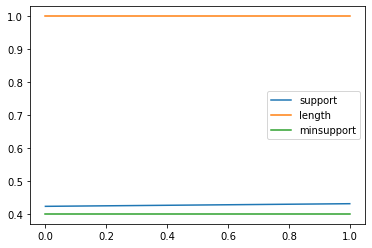

In [20]:
gf.plot()

In [246]:
frequent_itemsets1['minsupport'].value_counts()

0.1    39
0.2     8
0.3     2
0.4     2
Name: minsupport, dtype: int64

In [247]:
data_1=frequent_itemsets1[frequent_itemsets1['minsupport']==0.1]
data_1.head

<bound method NDFrame.head of     support                       itemsets length  minsupport  \
0    0.4230                     (ChildBks)      1         0.1   
1    0.2475                     (YouthBks)      1         0.1   
2    0.4310                      (CookBks)      1         0.1   
3    0.2820                     (DoItYBks)      1         0.1   
4    0.2145                       (RefBks)      1         0.1   
5    0.2410                       (ArtBks)      1         0.1   
6    0.2760                      (GeogBks)      1         0.1   
7    0.1135                     (ItalCook)      1         0.1   
8    0.1085                     (Florence)      1         0.1   
9    0.1650           (ChildBks, YouthBks)      2         0.1   
10   0.2560            (ChildBks, CookBks)      2         0.1   
11   0.1840           (ChildBks, DoItYBks)      2         0.1   
12   0.1515             (ChildBks, RefBks)      2         0.1   
13   0.1625             (ArtBks, ChildBks)      2         0.

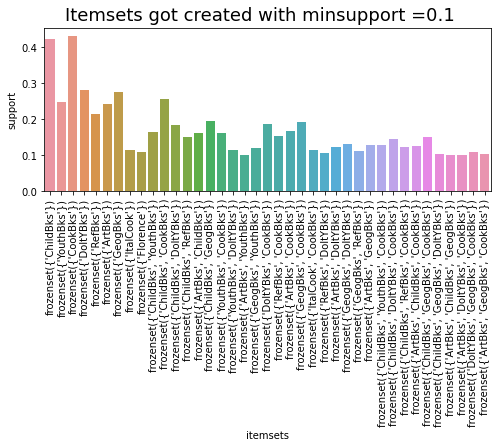

In [248]:
plt.figure(figsize=(8,3))
sns.barplot(data_1.itemsets,data_1.support)
plt.xticks(rotation=90)
plt.suptitle("Itemsets got created with minsupport =0.1",fontsize=18)
plt.show()

In [202]:
##Association Rule for 
rules = association_rules(data_1,  min_threshold=0.8)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ItalCook),(CookBks),0.1135,0.431,0.1135,1.000000,2.320186,0.064582,inf
1,"(ChildBks, RefBks)",(CookBks),0.1515,0.431,0.1225,0.808581,1.876058,0.057204,2.972534
2,"(RefBks, CookBks)",(ChildBks),0.1525,0.423,0.1225,0.803279,1.899004,0.057993,2.933083
3,"(ArtBks, DoItYBks)",(CookBks),0.1235,0.431,0.1015,0.821862,1.906873,0.048272,3.194159
4,"(GeogBks, DoItYBks)",(CookBks),0.1325,0.431,0.1085,0.818868,1.899926,0.051392,3.141354


In [203]:
# Support=

In [204]:
data_2=frequent_itemsets1[frequent_itemsets1['minsupport']==0.2]
data_2

,support,itemsets,length,minsupport,list_set
0,0.4230,(ChildBks),1,0.2,[ChildBks]
1,0.2475,(YouthBks),1,0.2,[YouthBks]
2,0.4310,(CookBks),1,0.2,[CookBks]
3,0.2820,(DoItYBks),1,0.2,[DoItYBks]
4,0.2145,(RefBks),1,0.2,[RefBks]
5,0.2410,(ArtBks),1,0.2,[ArtBks]
6,0.2760,(GeogBks),1,0.2,[GeogBks]
7,0.2560,"(ChildBks, CookBks)",2,0.2,"[ChildBks, CookBks]"


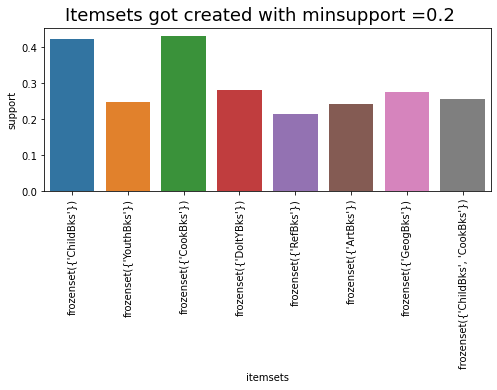

In [205]:
plt.figure(figsize=(8,3))
sns.barplot(data_2.itemsets,data_2.support)
plt.xticks(rotation=90)
plt.suptitle("Itemsets got created with minsupport =0.2",fontsize=18)
plt.show()

In [215]:
rules = association_rules(data_2, min_threshold=0.6)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ChildBks),(CookBks),0.423,0.431,0.256,0.605201,1.404179,0.073687,1.44124


In [224]:
## We are getting the same result with minsupport=0.3 and 0.4

In [225]:
data_4=frequent_itemsets1[frequent_itemsets1['minsupport']==0.4]
data_4

,support,itemsets,length,minsupport,list_set
0,0.423,(ChildBks),1,0.4,[ChildBks]
1,0.431,(CookBks),1,0.4,[CookBks]


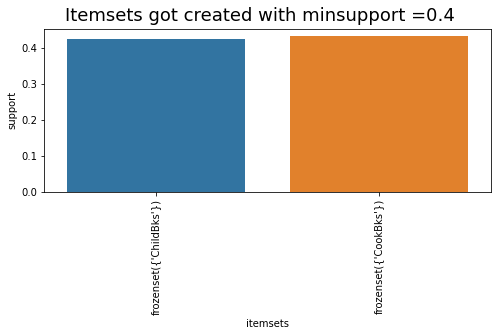

In [226]:
plt.figure(figsize=(8,3))
sns.barplot(data_4.itemsets,data_4.support)
plt.xticks(rotation=90)
plt.suptitle("Itemsets got created with minsupport =0.4",fontsize=18)
plt.show()

## We havent got any result for min supoort above 0.4

## Applying association rule with min support=0.1

In [236]:
frequent_itemsets2=apriori(book_df,min_support=0.1,use_colnames=True)
frequent_itemsets2['length']=frequent_itemsets['itemsets'].apply(lambda x:len(x))

## Applying Association rule with min threashold=0.8

In [240]:

rules = association_rules(frequent_itemsets2,  min_threshold=0.7)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(RefBks),(ChildBks),0.2145,0.423,0.1515,0.706294,1.669725,0.060767,1.964548
1,(GeogBks),(ChildBks),0.2760,0.423,0.1950,0.706522,1.670264,0.078252,1.966074
2,(RefBks),(CookBks),0.2145,0.431,0.1525,0.710956,1.649549,0.060050,1.968556
3,(ItalCook),(CookBks),0.1135,0.431,0.1135,1.000000,2.320186,0.064582,inf
4,"(ChildBks, YouthBks)",(CookBks),0.1650,0.431,0.1290,0.781818,1.813963,0.057885,2.607917


In [241]:
l=rules.pivot('antecedents','consequents','lift')
l.head()

consequents,(ChildBks),(CookBks)
antecedents,,
(RefBks),1.669725,1.649549
(GeogBks),1.670264,NaN
(ItalCook),NaN,2.320186
"(ChildBks, YouthBks)",NaN,1.813963
"(YouthBks, CookBks)",1.882497,NaN


(array([0.5, 1.5]),
 [Text(0.5, 0, "frozenset({'ChildBks'})"),
  Text(1.5, 0, "frozenset({'CookBks'})")])

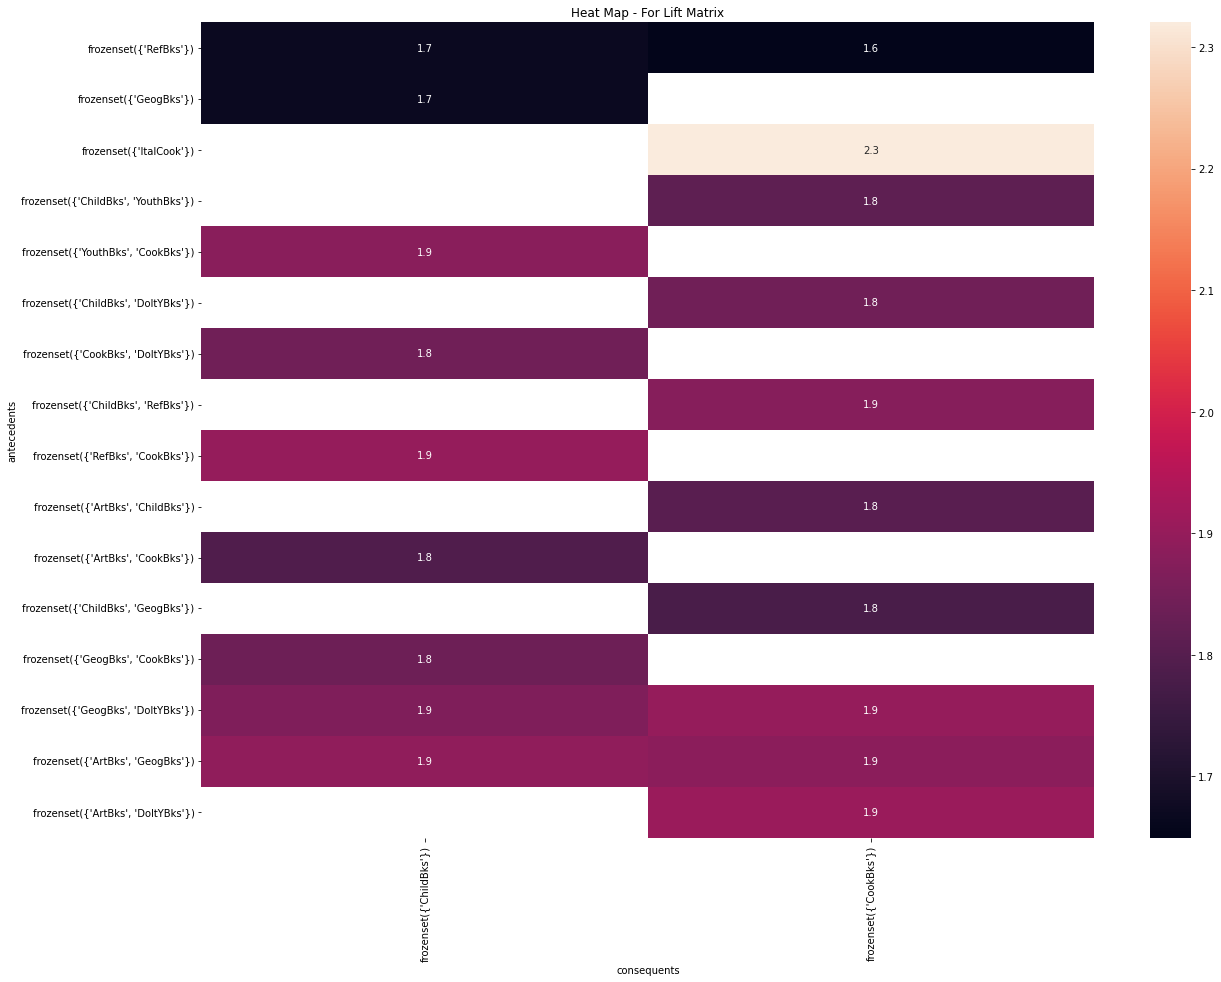

In [242]:
plt.figure(figsize=(20,15))
sns.heatmap(l,annot = True)
plt.title('Heat Map - For Lift Matrix')
plt.yticks(rotation=0)
plt.xticks(rotation=90)

### Child books and cook books have good association -because those who have children tend explore recipes for their kids if they fussy eaters
### Family tries to find new project to do with kids / craetive time spending / building new things to accomodate growing family so many people buy children books and do it yourselves

## Its very obvious who buy ital cook  books they buy other cooking books